In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

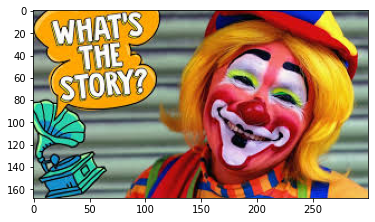

In [3]:
########## Reading the image #########
img = cv2.imread('clown.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

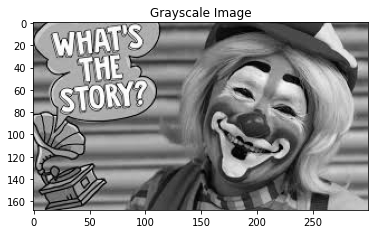

In [4]:
########## Converting the image into grayscale ###########
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img , cmap ='gray')
plt.title('Grayscale Image')
plt.show()

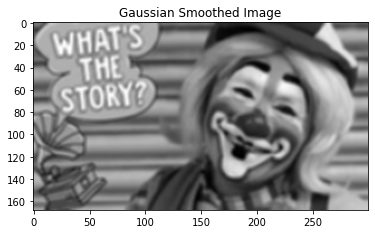

In [5]:
########## Applying Gaussian smoothing on the image in order to reduce the effect of noise ###############
gaussian = cv2.GaussianBlur(gray_img , (5,5) , 1.5,1.5)
########## Displaying the Gaussian Smoothed image ##########
plt.imshow(gaussian,cmap = 'gray')
plt.title('Gaussian Smoothed Image')
plt.show()

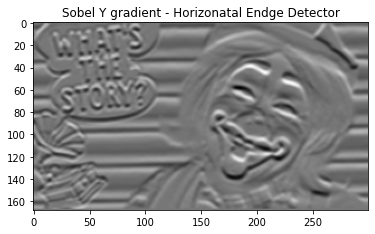

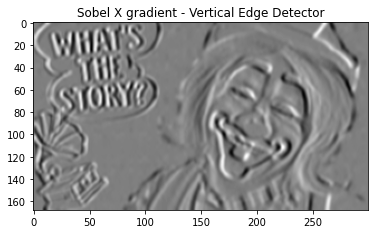

In [6]:
############ Sobel filtering of the images ##############

########## The Y sobel filter gives the Y gradient which recognizes the horizontal edges ###########
########## The filter is of form :
########## -1 0 1
########## -2 0 2
########## -1 0 1
sobel_y = cv2.Sobel(gaussian,cv2.CV_64F,0,1,ksize = 3)
plt.imshow(sobel_y,cmap = 'gray')
plt.title('Sobel Y gradient - Horizonatal Endge Detector')
plt.show()

########## The X sobel filter gives the X gradient which recognizes the vertical edges ###########
########## The filter is of form :
##########  1  2  1
##########  0  0  0
########## -1 -2 -1
sobel_x = cv2.Sobel(gaussian , cv2.CV_64F,1,0,ksize = 3)
plt.imshow(sobel_x,cmap = 'gray')
plt.title('Sobel X gradient - Vertical Edge Detector')
plt.show()

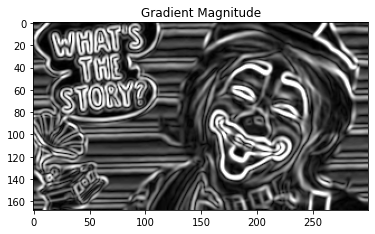

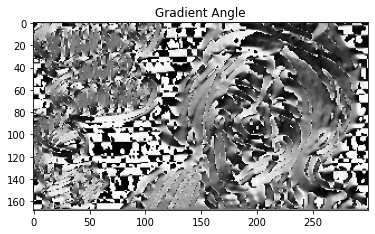

In [7]:
############ Calculating the gradient magnitude using the formula : 
############ sqrt( gx^2 + gy^2 )
############ Then, we usr the convertScaleAbs to convert the gradient to [0,255] scale
grad_mag = cv2.convertScaleAbs(np.sqrt(sobel_x **2 + sobel_y **2))
plt.imshow(grad_mag,cmap = 'gray')
plt.title('Gradient Magnitude')
plt.show()

########### Calculating the gradient angle using the formula :
########### arctan(gy/gx)
########### We add a very small float value in order to prevent the overflow incase sobel_x = 0
########### We use np.degrees to convert the angle from rads to degrees
grad_angle = np.degrees(np.arctan(sobel_y/(sobel_x+1e-200)))
plt.imshow(grad_angle,cmap ='gray')
plt.title('Gradient Angle')
plt.show()

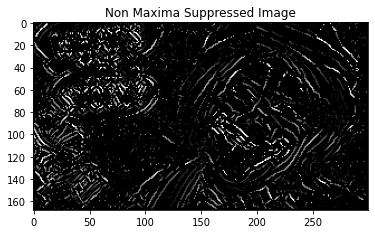

In [8]:
############ Function to perform non maxima suppression
def non_maxima_suppression(angles_degrees,gradient_magnitude) :
	non_maxima_suppressed = np.zeros(angles_degrees.shape)

	for i in range(1,angles_degrees.shape[0]-1) :
		for j in range(1,angles_degrees.shape[1]-1) :
########### In order to perform the non maxima suppression, we calculate the nearest points by approximating the angle of the gradient
########### the angle of the point is assumed to be one of the following : [ -90 , -45 , 0 , 45 , 90 ]
########### We make the approximation by taking the closest angle from the above set to the actual angle of the gradient at that point
########### Once we make the approximation, we should check if the gradient of the point dominates over the gradient of the points along the angle of the 
########### gradient. If it dominates, we keep the gradient else we suppress it to zero.      
			if angles_degrees[i,j] >=-22.5 and angles_degrees[i,j] <=22.5 and gradient_magnitude[i,j] > gradient_magnitude[i-1,j] and gradient_magnitude[i,j] > gradient_magnitude[i+1,j] :
					non_maxima_suppressed[i,j] = gradient_magnitude[i,j] 

			if angles_degrees[i,j] >22.5 and angles_degrees[i,j] <= 67.5 and gradient_magnitude[i,j] > gradient_magnitude[i-1,j-1] and gradient_magnitude[i,j] > gradient_magnitude[i+1,j+1] :
					non_maxima_suppressed[i,j] = gradient_magnitude[i,j] 

			if angles_degrees[i,j] > 67.5 and angles_degrees[i,j] <=90 and gradient_magnitude[i,j] > gradient_magnitude[i,j-1] and gradient_magnitude[i,j] > gradient_magnitude[i,j+1] :
					non_maxima_suppressed[i,j] = gradient_magnitude[i,j] 

			if angles_degrees[i,j] >=-90 and angles_degrees[i,j] <=-67.5 and gradient_magnitude[i,j] > gradient_magnitude[i,j-1] and gradient_magnitude[i,j] > gradient_magnitude[i,j+1] :
					non_maxima_suppressed[i,j] = gradient_magnitude[i,j] 

			if angles_degrees[i,j] >=-67.5 and angles_degrees[i,j] <-22.5 and gradient_magnitude[i,j] > gradient_magnitude[i+1,j-1] and gradient_magnitude[i,j] > gradient_magnitude[i-1,j+1] :
					non_maxima_suppressed[i,j] = gradient_magnitude[i,j] 

	return non_maxima_suppressed

non_max_gradient = non_maxima_suppression(grad_angle,grad_mag)
plt.imshow(non_max_gradient,cmap = 'gray')
plt.title('Non Maxima Suppressed Image')
plt.show()

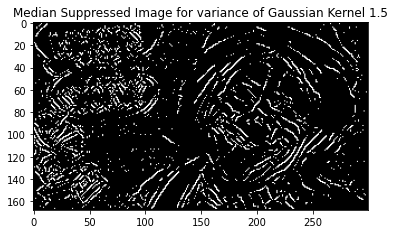

In [11]:
########## We calculate the median of the image below
threshold = np.median(grad_mag)
threshold_gradient = np.zeros(non_max_gradient.shape)

for i in range(non_max_gradient.shape[0]) :
	for j in range(non_max_gradient.shape[1]) :
########## We suppress the gradients whose values are less than that of the threshold
		if non_max_gradient[i,j] > threshold :
			threshold_gradient[i,j] = 255

plt.imshow(threshold_gradient , cmap = 'gray')
plt.title('Median Suppressed Image for variance of Gaussian Kernel 1.5')
plt.show()

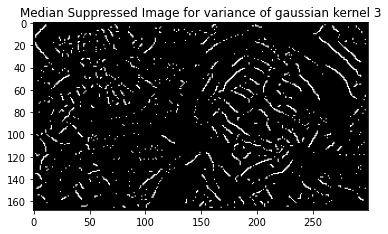

In [14]:
############# Variance of the Kernel is 3 ################
gaussian_3 = cv2.GaussianBlur(gray_img , (19,19) , 3,3)

sobel_y_3 = cv2.Sobel(gaussian_3,cv2.CV_64F,0,1,ksize = 3)
sobel_x_3 = cv2.Sobel(gaussian_3,cv2.CV_64F,1,0,ksize = 3)

grad_mag_3 = cv2.convertScaleAbs(np.sqrt(sobel_x_3**2 + sobel_y_3**2))
grad_angle_3 = np.degrees(np.arctan(sobel_y_3/(sobel_x_3+1e-200)))

non_max_gradient_3 = non_maxima_suppression(grad_angle_3,grad_mag_3)

threshold_3 = np.median(grad_mag_3)
threshold_gradient_3 = np.zeros(non_max_gradient_3.shape)

for i in range(non_max_gradient_3.shape[0]) :
	for j in range(non_max_gradient_3.shape[1]) :
		if non_max_gradient_3[i,j] > threshold_3 :
			threshold_gradient_3[i,j] = 255

plt.imshow(threshold_gradient_3 , cmap = 'gray')
plt.title('Median Suppressed Image for variance of gaussian kernel 3')
plt.show()